# Part1 -- Data Prepare
Source Data https://github.com/foospidy/payloads

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
def from_txt_to_dataframe(src_file,is_malicious,injection_type):
    
    #read file
    payloads_txt = open('data/{}.txt'.format(src_file),'r',encoding='UTF-8').readlines()
    
    #create dataframe
    
    payloads = pd.DataFrame(payloads_txt,columns=['payload'])
    payloads['is_malicious'] = [is_malicious]*len(payloads)
    payloads['injection_type'] = [injection_type]*len(payloads)
    
    print('First 5 lines of ' + injection_type)
    display(payloads.head(10)) # default is 5
    
    return payloads

In [3]:
# payloads = pd.DataFrame(columns=['payload','is_malicious','injection_type'])
# payloads = payloads.append(from_txt_to_dataframe('SQLCollection',1,'SQL'))

In [4]:
# payloads = payloads.append(from_txt_to_dataframe('XSSCollection',1,'XSS'))

In [5]:
# payloads = payloads.append(from_txt_to_dataframe('ShellCollection',1,'SHELL'))

In [6]:
# payloads = payloads.append(from_txt_to_dataframe('non-maliciousCollection',0,'LEGAL'))

In [7]:
payloads = pd.read_csv("data/payloads.csv",index_col='index')
display(payloads.head(20))

,payload,is_malicious,injection_type
index,,,
0,37662577P,0.0,LEGAL
1,shirting,0.0,LEGAL
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS
3,obeying,0.0,LEGAL
4,dictating,0.0,LEGAL
5,lafleur,0.0,LEGAL
6,capturers,0.0,LEGAL
7,8nca58z48,0.0,LEGAL
8,autocratic,0.0,LEGAL


# Part 2 -- Features Extract

In [8]:
print(type(payloads), payloads.shape)
display(payloads.head(50))

<class 'pandas.core.frame.DataFrame'> (110357, 3)


,payload,is_malicious,injection_type
index,,,
0,37662577P,0.0,LEGAL
1,shirting,0.0,LEGAL
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS
3,obeying,0.0,LEGAL
4,dictating,0.0,LEGAL
5,lafleur,0.0,LEGAL
6,capturers,0.0,LEGAL
7,8nca58z48,0.0,LEGAL
8,autocratic,0.0,LEGAL


In [9]:
def create_length_feature(payloads):
    payloads['length'] = [len(str(r)) for r in payloads['payload']]
    return payloads

In [10]:
payloads = create_length_feature(payloads)
display(payloads.head(50))

,payload,is_malicious,injection_type,length
index,,,,
0,37662577P,0.0,LEGAL,9
1,shirting,0.0,LEGAL,8
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31
3,obeying,0.0,LEGAL,7
4,dictating,0.0,LEGAL,9
5,lafleur,0.0,LEGAL,7
6,capturers,0.0,LEGAL,9
7,8nca58z48,0.0,LEGAL,9
8,autocratic,0.0,LEGAL,10


In [11]:
print(payloads['length'].name)
print(payloads['length'].describe())
print(payloads['length'].describe().name)
print(payloads['length'].describe().dtype)
print(payloads['length'].describe().mean)
print(payloads['length'].describe()[7])

length
count    110357.000000
mean         16.559629
std          32.108640
min           1.000000
25%           6.000000
50%           9.000000
75%          14.000000
max         974.000000
Name: length, dtype: float64
length
float64
<bound method Series.mean of count    110357.000000
mean         16.559629
std          32.108640
min           1.000000
25%           6.000000
50%           9.000000
75%          14.000000
max         974.000000
Name: length, dtype: float64>
974.0


In [12]:
import string
def create_non_printable_characters_feature(payloads):
    payloads['non_printable_chars'] = [len([1 for c in str(r) if c not in string.printable]) for r in payloads['payload']]
    return payloads

In [13]:
print(string.printable, len(string.printable), string.printable[:62], string.printable[62:100])
# for i, c in enumerate(string.printable[62:100]): print(i,c)
payloads = create_non_printable_characters_feature(payloads)
display(payloads.head(50))

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	
 100 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



,payload,is_malicious,injection_type,length,non_printable_chars
index,,,,,
0,37662577P,0.0,LEGAL,9,0
1,shirting,0.0,LEGAL,8,0
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0
3,obeying,0.0,LEGAL,7,0
4,dictating,0.0,LEGAL,9,0
5,lafleur,0.0,LEGAL,7,0
6,capturers,0.0,LEGAL,9,0
7,8nca58z48,0.0,LEGAL,9,0
8,autocratic,0.0,LEGAL,10,0


In [14]:
print(payloads['non_printable_chars'].name)
print(payloads['non_printable_chars'].describe())
print(payloads['non_printable_chars'].describe().name)
print(payloads['non_printable_chars'].describe().dtype)
print(payloads['non_printable_chars'].describe().mean)
print(payloads['non_printable_chars'].describe()[7])

non_printable_chars
count    110357.000000
mean          0.007412
std           0.216736
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: non_printable_chars, dtype: float64
non_printable_chars
float64
<bound method Series.mean of count    110357.000000
mean          0.007412
std           0.216736
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          30.000000
Name: non_printable_chars, dtype: float64>
30.0


In [15]:
def create_punctuation_chars_feature(payloads):
    payloads['punctuation'] = [ len([1 for c in str(r) if c in string.punctuation]) for r in payloads['payload']]
    return payloads

In [16]:
print(string.punctuation)
payloads = create_punctuation_chars_feature(payloads)
display(payloads.head(50))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,payload,is_malicious,injection_type,length,non_printable_chars,punctuation
index,,,,,,
0,37662577P,0.0,LEGAL,9,0,0
1,shirting,0.0,LEGAL,8,0,0
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0,11
3,obeying,0.0,LEGAL,7,0,0
4,dictating,0.0,LEGAL,9,0,0
5,lafleur,0.0,LEGAL,7,0,0
6,capturers,0.0,LEGAL,9,0,0
7,8nca58z48,0.0,LEGAL,9,0,0
8,autocratic,0.0,LEGAL,10,0,0


In [17]:
print(payloads['punctuation'].name)
print(payloads['punctuation'].describe())
print(payloads['punctuation'].describe().name)
print(payloads['punctuation'].describe().dtype)
print(payloads['punctuation'].describe().mean)
print(payloads['punctuation'].describe()[7])

punctuation
count    110357.000000
mean          2.363729
std           9.771260
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         538.000000
Name: punctuation, dtype: float64
punctuation
float64
<bound method Series.mean of count    110357.000000
mean          2.363729
std           9.771260
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         538.000000
Name: punctuation, dtype: float64>
538.0


In [18]:
# for r in payloads['payload']: print(r, min(str(r)))

In [19]:
def create_min_byte_value_feature(payloads):
    payloads['min-byte'] = [ min(bytearray(str(r), 'utf-8')) for r in payloads['payload']]
    return payloads

In [20]:
payloads = create_min_byte_value_feature(payloads)
display(payloads.head(50))

,payload,is_malicious,injection_type,length,non_printable_chars,punctuation,min-byte
index,,,,,,,
0,37662577P,0.0,LEGAL,9,0,0,50
1,shirting,0.0,LEGAL,8,0,0,103
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0,11,37
3,obeying,0.0,LEGAL,7,0,0,98
4,dictating,0.0,LEGAL,9,0,0,97
5,lafleur,0.0,LEGAL,7,0,0,97
6,capturers,0.0,LEGAL,9,0,0,97
7,8nca58z48,0.0,LEGAL,9,0,0,52
8,autocratic,0.0,LEGAL,10,0,0,97


In [21]:
print(payloads['min-byte'].name)
print(payloads['min-byte'].describe())
print(payloads['min-byte'].describe().name)
print(payloads['min-byte'].describe().dtype)
print(payloads['min-byte'].describe().mean)
print(payloads['min-byte'].describe()[7])

min-byte
count    110357.000000
mean         71.225749
std          26.545783
min           9.000000
25%          48.000000
50%          75.000000
75%          97.000000
max         125.000000
Name: min-byte, dtype: float64
min-byte
float64
<bound method Series.mean of count    110357.000000
mean         71.225749
std          26.545783
min           9.000000
25%          48.000000
50%          75.000000
75%          97.000000
max         125.000000
Name: min-byte, dtype: float64>
125.0


In [22]:
def create_max_byte_value_feature(payloads):
    payloads['max-byte'] = [ max(bytearray(str(r), 'utf-8')) for r in payloads['payload'] ]
    return payloads

In [23]:
payloads = create_max_byte_value_feature(payloads)
display(payloads.head(50))

,payload,is_malicious,injection_type,length,non_printable_chars,punctuation,min-byte,max-byte
index,,,,,,,,
0,37662577P,0.0,LEGAL,9,0,0,50,80
1,shirting,0.0,LEGAL,8,0,0,103,116
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0,11,37,119
3,obeying,0.0,LEGAL,7,0,0,98,121
4,dictating,0.0,LEGAL,9,0,0,97,116
5,lafleur,0.0,LEGAL,7,0,0,97,117
6,capturers,0.0,LEGAL,9,0,0,97,117
7,8nca58z48,0.0,LEGAL,9,0,0,52,122
8,autocratic,0.0,LEGAL,10,0,0,97,117


In [24]:
print(payloads['max-byte'].name)
print(payloads['max-byte'].describe())
print(payloads['max-byte'].describe().name)
print(payloads['max-byte'].describe().dtype)
print(payloads['max-byte'].describe().mean)
print(payloads['max-byte'].describe()[7])

max-byte
count    110357.000000
mean        109.495166
std          20.327684
min          33.000000
25%         114.000000
50%         116.000000
75%         118.000000
max         240.000000
Name: max-byte, dtype: float64
max-byte
float64
<bound method Series.mean of count    110357.000000
mean        109.495166
std          20.327684
min          33.000000
25%         114.000000
50%         116.000000
75%         118.000000
max         240.000000
Name: max-byte, dtype: float64>
240.0


In [25]:
def create_mean_byte_value_feature(payloads):
    payloads['mean-byte'] = [ sum(bytearray(str(r), 'utf-8'))/ len(bytearray(str(r), 'utf-8')) for r in payloads['payload']]
    return payloads

In [26]:
payloads = create_mean_byte_value_feature(payloads)
display(payloads.head(50))

,payload,is_malicious,injection_type,length,non_printable_chars,punctuation,min-byte,max-byte,mean-byte
index,,,,,,,,,
0,37662577P,0.0,LEGAL,9,0,0,50,80,56.333333
1,shirting,0.0,LEGAL,8,0,0,103,116,109.000000
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0,11,37,119,65.806452
3,obeying,0.0,LEGAL,7,0,0,98,121,107.000000
4,dictating,0.0,LEGAL,9,0,0,97,116,105.666667
5,lafleur,0.0,LEGAL,7,0,0,97,117,106.714286
6,capturers,0.0,LEGAL,9,0,0,97,117,109.444444
7,8nca58z48,0.0,LEGAL,9,0,0,52,122,77.888889
8,autocratic,0.0,LEGAL,10,0,0,97,117,107.100000


In [27]:
print(payloads['mean-byte'].name)
print(payloads['mean-byte'].describe())
print(payloads['mean-byte'].describe().name)
print(payloads['mean-byte'].describe().dtype)
print(payloads['mean-byte'].describe().mean)
print(payloads['mean-byte'].describe()[7])

mean-byte
count    110357.000000
mean         92.953226
std          19.316953
min          33.000000
25%          83.416667
50%         101.875000
75%         107.142857
max         164.000000
Name: mean-byte, dtype: float64
mean-byte
float64
<bound method Series.mean of count    110357.000000
mean         92.953226
std          19.316953
min          33.000000
25%          83.416667
50%         101.875000
75%         107.142857
max         164.000000
Name: mean-byte, dtype: float64>
164.0


In [28]:
def create_standard_deviation_byte_value_feature(payloads):
    payloads['standard-deviation-byte'] = [ np.std(bytearray(str(r), 'utf-8')) for r in payloads['payload']]
    return payloads

In [29]:
payloads = create_standard_deviation_byte_value_feature(payloads)
display(payloads.head(50))

,payload,is_malicious,injection_type,length,non_printable_chars,punctuation,min-byte,max-byte,mean-byte,standard-deviation-byte
index,,,,,,,,,,
0,37662577P,0.0,LEGAL,9,0,0,50,80,56.333333,8.537499
1,shirting,0.0,LEGAL,8,0,0,103,116,109.000000,5.049752
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0,11,37,119,65.806452,26.617263
3,obeying,0.0,LEGAL,7,0,0,98,121,107.000000,7.151423
4,dictating,0.0,LEGAL,9,0,0,97,116,105.666667,6.599663
5,lafleur,0.0,LEGAL,7,0,0,97,117,106.714286,6.670067
6,capturers,0.0,LEGAL,9,0,0,97,117,109.444444,7.558823
7,8nca58z48,0.0,LEGAL,9,0,0,52,122,77.888889,26.904954
8,autocratic,0.0,LEGAL,10,0,0,97,117,107.100000,8.117266


In [30]:
print(payloads['standard-deviation-byte'].name)
print(payloads['standard-deviation-byte'].describe())
print(payloads['standard-deviation-byte'].describe().name)
print(payloads['standard-deviation-byte'].describe().dtype)
print(payloads['standard-deviation-byte'].describe().mean)
print(payloads['standard-deviation-byte'].describe()[7])

standard-deviation-byte
count    110357.000000
mean         12.656653
std           9.197185
min           0.000000
25%           5.914355
50%           7.812810
75%          20.754440
max          75.013332
Name: standard-deviation-byte, dtype: float64
standard-deviation-byte
float64
<bound method Series.mean of count    110357.000000
mean         12.656653
std           9.197185
min           0.000000
25%           5.914355
50%           7.812810
75%          20.754440
max          75.013332
Name: standard-deviation-byte, dtype: float64>
75.0133321483588


In [31]:
def create_distinct_byte_value_feature(payloads):
    payloads['distinct-byte'] = [ len(set(str(r))) for r in payloads['payload']]
    return payloads

In [32]:
payloads = create_distinct_byte_value_feature(payloads)
display(payloads.head(50))

,payload,is_malicious,injection_type,length,non_printable_chars,punctuation,min-byte,max-byte,mean-byte,standard-deviation-byte,distinct-byte
index,,,,,,,,,,,
0,37662577P,0.0,LEGAL,9,0,0,50,80,56.333333,8.537499,6
1,shirting,0.0,LEGAL,8,0,0,103,116,109.000000,5.049752,7
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0,11,37,119,65.806452,26.617263,18
3,obeying,0.0,LEGAL,7,0,0,98,121,107.000000,7.151423,7
4,dictating,0.0,LEGAL,9,0,0,97,116,105.666667,6.599663,7
5,lafleur,0.0,LEGAL,7,0,0,97,117,106.714286,6.670067,6
6,capturers,0.0,LEGAL,9,0,0,97,117,109.444444,7.558823,8
7,8nca58z48,0.0,LEGAL,9,0,0,52,122,77.888889,26.904954,7
8,autocratic,0.0,LEGAL,10,0,0,97,117,107.100000,8.117266,7


In [33]:
print(payloads['distinct-byte'].name)
print(payloads['distinct-byte'].describe())
print(payloads['distinct-byte'].describe().name)
print(payloads['distinct-byte'].describe().dtype)
print(payloads['distinct-byte'].describe().mean)
print(payloads['distinct-byte'].describe()[7])

distinct-byte
count    110357.000000
mean          9.477577
std           7.398486
min           1.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          76.000000
Name: distinct-byte, dtype: float64
distinct-byte
float64
<bound method Series.mean of count    110357.000000
mean          9.477577
std           7.398486
min           1.000000
25%           5.000000
50%           7.000000
75%          10.000000
max          76.000000
Name: distinct-byte, dtype: float64>
76.0


In [34]:
sql_keywords = pd.read_csv('data/SQLKeywords.txt', index_col=False)
def create_sql_keywords_feature(payloads):
    payloads['sql-keywords'] = [ len([1 for keyword in sql_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads

In [35]:
create_sql_keywords_feature(payloads)
display(payloads.head(50))

,payload,is_malicious,injection_type,length,non_printable_chars,punctuation,min-byte,max-byte,mean-byte,standard-deviation-byte,distinct-byte,sql-keywords
index,,,,,,,,,,,,
0,37662577P,0.0,LEGAL,9,0,0,50,80,56.333333,8.537499,6,0
1,shirting,0.0,LEGAL,8,0,0,103,116,109.000000,5.049752,7,0
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0,11,37,119,65.806452,26.617263,18,0
3,obeying,0.0,LEGAL,7,0,0,98,121,107.000000,7.151423,7,0
4,dictating,0.0,LEGAL,9,0,0,97,116,105.666667,6.599663,7,0
5,lafleur,0.0,LEGAL,7,0,0,97,117,106.714286,6.670067,6,0
6,capturers,0.0,LEGAL,9,0,0,97,117,109.444444,7.558823,8,0
7,8nca58z48,0.0,LEGAL,9,0,0,52,122,77.888889,26.904954,7,0
8,autocratic,0.0,LEGAL,10,0,0,97,117,107.100000,8.117266,7,0


In [36]:
js_keywords = pd.read_csv('data/JavascriptKeywords.txt', index_col=False)
def create_javascript_keywords_feature(payloads):
    payloads['js-keywords'] = [len([1 for keyword in js_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads

In [37]:
create_javascript_keywords_feature(payloads)
display(payloads.head(50))

,payload,is_malicious,injection_type,length,non_printable_chars,punctuation,min-byte,max-byte,mean-byte,standard-deviation-byte,distinct-byte,sql-keywords,js-keywords
index,,,,,,,,,,,,,
0,37662577P,0.0,LEGAL,9,0,0,50,80,56.333333,8.537499,6,0,0
1,shirting,0.0,LEGAL,8,0,0,103,116,109.000000,5.049752,7,0,1
2,&kw=%27;alert%28%27XSS%27%29;//,1.0,XSS,31,0,11,37,119,65.806452,26.617263,18,0,1
3,obeying,0.0,LEGAL,7,0,0,98,121,107.000000,7.151423,7,0,1
4,dictating,0.0,LEGAL,9,0,0,97,116,105.666667,6.599663,7,0,1
5,lafleur,0.0,LEGAL,7,0,0,97,117,106.714286,6.670067,6,0,0
6,capturers,0.0,LEGAL,9,0,0,97,117,109.444444,7.558823,8,0,0
7,8nca58z48,0.0,LEGAL,9,0,0,52,122,77.888889,26.904954,7,0,0
8,autocratic,0.0,LEGAL,10,0,0,97,117,107.100000,8.117266,7,0,0


In [38]:
payloads.to_csv("data/processed_payloads.csv", encoding='utf-8', index = True, header=True)

In [39]:
login_keywords = pd.read_csv('data/darkweb2017-top10000.txt', index_col=False)
# print(login_keywords, type(login_keywords), login_keywords.shape)
def create_web_login_keywords_feature(payloads):
    payloads['login_keywords'] = [len([1 for keyword in login_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads

In [40]:
# create_web_login_keywords_feature(payloads)
# display(payloads.head(50))

In [41]:
name_keywords = pd.read_csv('data/names.txt', index_col=False)
def create_name_keywords_feature(payloads):
    payloads['name-keywords'] = [len([1 for keyword in name_keywords['Keyword'] if str(keyword).lower() in str(row).lower()]) for row in payloads['payload']]
    return payloads

In [42]:
# create_name_keywords_feature(payloads)
# display(payloads.head(50))

In [43]:
def create_features(payloads):
    features = create_length_feature(payloads)
    features = create_non_printable_characters_feature(features)
    features = create_punctuation_chars_feature(features)
    features = create_max_byte_value_feature(features)
    features = create_min_byte_value_feature(features)
    features = create_mean_byte_value_feature(features)
    features = create_standard_deviation_byte_value_feature(features)
    features = create_distinct_byte_value_feature(features)
    features = create_sql_keywords_feature(features)
    del features['payload']
    return features

In [44]:
def create_powerful_features(payloads):
    features = create_web_login_keywords_feature(payloads)
    features = create_name_keywords_feature(features)
    del features['payload']
    return features

In [45]:
Y = payloads['is_malicious']
X = create_features(pd.DataFrame(payloads['payload'][:]))

In [46]:
display(X.head(50))

,length,non_printable_chars,punctuation,max-byte,min-byte,mean-byte,standard-deviation-byte,distinct-byte,sql-keywords
index,,,,,,,,,
0,9,0,0,80,50,56.333333,8.537499,6,0
1,8,0,0,116,103,109.000000,5.049752,7,0
2,31,0,11,119,37,65.806452,26.617263,18,0
3,7,0,0,121,98,107.000000,7.151423,7,0
4,9,0,0,116,97,105.666667,6.599663,7,0
5,7,0,0,117,97,106.714286,6.670067,6,0
6,9,0,0,117,97,109.444444,7.558823,8,0
7,9,0,0,122,52,77.888889,26.904954,7,0
8,10,0,0,117,97,107.100000,8.117266,7,0


In [47]:
display(Y.head(50))

index
0     0.0
1     0.0
2     1.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    1.0
20    0.0
21    1.0
22    1.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    1.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
Name: is_malicious, dtype: float64

In [48]:
print(X.shape, Y.shape)

(110357, 9) (110357,)


# Part 3 -- Model Selection

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [50]:
def create_classifier(type):
    if type == 'AdaBoost': clf = AdaBoostClassifier(n_estimators=100)
    elif type == "LogisticRegressionL1": clf = LogisticRegression(penalty='l1', tol=0.0001, C=1.0) 
    elif type == "LogisticRegressionL2": clf = LogisticRegression(penalty='l2', tol=0.0001, C=1.0) 
    elif type == "SGD": clf = SGDClassifier(loss="log", penalty="l2")
    elif type == "MLPClassifier": clf = MLPClassifier(activation='relu', solver='adam', early_stopping=False, verbose=True)
    elif type == 'SVC':  clf = SVC()
    elif type == 'RandomForest': clf = RandomForestClassifier(max_depth=None, min_samples_split=2, random_state=0)
    elif type == 'DecisionTreeClassifier': clf = DecisionTreeClassifier()
    elif type == 'MultinomialNB': clf = MultinomialNB()
    else: clf = LogisticRegression(penalty='l2', tol=0.0001, C=1.0)
    return clf 

In [51]:
AdaBoost = create_classifier("AdaBoost")
LR1 = create_classifier("LogisticRegressionL1")
LR2 = create_classifier("LogisticRegressionL2")
SGD = create_classifier("SGD")
MLP = create_classifier("MLPClassifier")
SVC = create_classifier("SVC")
RF = create_classifier("RandomForest")
DT = create_classifier("DecisionTreeClassifier")
MNB = create_classifier("MultinomialNB")

In [52]:
shuffle(X)
shuffle(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75,test_size=0.25)

In [53]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(82767, 9) (82767,)
(27590, 9) (27590,)


In [54]:
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

# Part 4 -- Model Evalution

In [55]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## 4.1 --  AdaBoost

In [56]:
ada_x_train, ada_y_train = x_train[:], y_train[:]
AdaBoost.fit(ada_x_train, ada_y_train)
# AdaBoost.fit(x_train[:],y_train[:], verbose = 1)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [57]:
Ada_x_test =  x_test[:]
Ada_y_test = AdaBoost.predict(Ada_x_test)
print(Ada_y_test.shape)

(27590,)


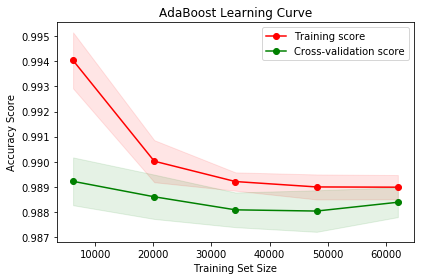

In [58]:
train_sizes, train_scores, test_scores = learning_curve(AdaBoost, ada_x_train, ada_y_train, cv = 4, scoring='accuracy', n_jobs=-1)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Create plot
plt.title("AdaBoost Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [59]:
print(confusion_matrix(y_test, Ada_y_test))
tn, fp, fn, tp = confusion_matrix(y_test, Ada_y_test).ravel()
print(tn, fp, fn, tp)

[[24962   132]
 [  176  2320]]
24962 132 176 2320


In [60]:
print(classification_report(y_test, Ada_y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     25094
         1.0       0.95      0.93      0.94      2496

   micro avg       0.99      0.99      0.99     27590
   macro avg       0.97      0.96      0.97     27590
weighted avg       0.99      0.99      0.99     27590



In [61]:
print('hamming loss: ', hamming_loss(y_test, Ada_y_test))
print('log loss: ', log_loss(y_test, Ada_y_test))
print('zero one loss: ', zero_one_loss(y_test, Ada_y_test))

hamming loss:  0.011163465023559261
log loss:  0.3855762477888112
zero one loss:  0.01116346502355925


In [62]:
print('mean absolute error: ',  mean_absolute_error(y_test, Ada_y_test) )
print('mean squared error: ', mean_squared_error(y_test, Ada_y_test) )
print('mean squared log error: ',  mean_squared_log_error(y_test, Ada_y_test) )
print('median absolute error: ', median_absolute_error(y_test, Ada_y_test) )

mean absolute error:  0.011163465023559261
mean squared error:  0.011163465023559261
mean squared log error:  0.0053635204163394725
median absolute error:  0.0


In [63]:
print( 'accuracy score: ', accuracy_score(y_test, Ada_y_test) )
precision_score = metrics.precision_score(y_test, Ada_y_test)
print('precision score: ' , precision_score )
recall_score = metrics.recall_score(y_test, Ada_y_test)
print('recall score: ' , recall_score)
f1_score = metrics.f1_score(y_test, Ada_y_test) # f1 = (2 * pre * rec) / (pre + rec)
print('F1 score: ' , f1_score)
auc_score = roc_auc_score(y_test, Ada_y_test)
print('auc_score: ', auc_score)

accuracy score:  0.9888365349764408
precision score:  0.9461663947797716
recall score:  0.9294871794871795
F1 score:  0.9377526273241714
auc_score:  0.9621134789601355


In [64]:
print('precision_recall_curve: \n', precision_recall_curve(y_test, Ada_y_test))
pre, rec, t = precision_recall_curve(y_test, Ada_y_test)
print(pre, rec, t)
print('roc curve: \n', roc_curve(y_test, Ada_y_test))
fpr, tpr, thresholds = roc_curve(y_test, Ada_y_test)
print(fpr, tpr, thresholds)

precision_recall_curve: 
 (array([0.09046756, 0.94616639, 1.        ]), array([1.        , 0.92948718, 0.        ]), array([0., 1.]))
[0.09046756 0.94616639 1.        ] [1.         0.92948718 0.        ] [0. 1.]
roc curve: 
 (array([0.        , 0.00526022, 1.        ]), array([0.        , 0.92948718, 1.        ]), array([2., 1., 0.]))
[0.         0.00526022 1.        ] [0.         0.92948718 1.        ] [2. 1. 0.]


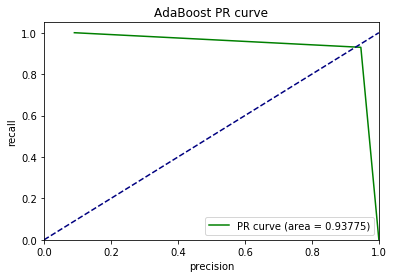

In [65]:
plt.figure()
plt.plot(pre, rec, color ='green', label='PR curve (area = %0.5f)' % f1_score)
plt.plot([0, 1], [0, 1], color ='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('AdaBoost PR curve')
plt.legend(loc="lower right")
plt.show()
plt.close() 

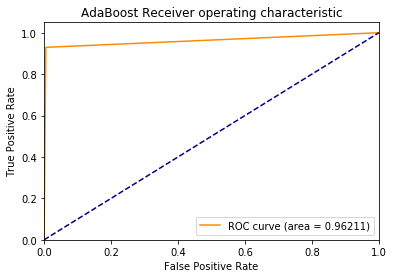

In [66]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.close() 

## 4.2 --  Logistic Regression L1

In [67]:
LR1_x_train, LR1_y_train = x_train[:], y_train[:]
LR1.fit(LR1_x_train, LR1_y_train)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
LR1_x_test =  x_test[:]
LR1_y_test = LR1.predict(LR1_x_test)
print(LR1_y_test.shape)

(27590,)


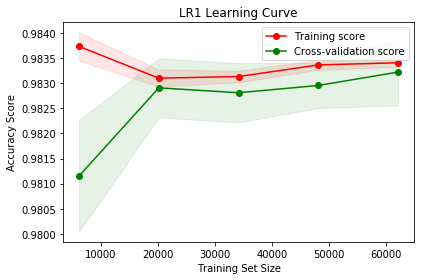

In [69]:
train_sizes, train_scores, test_scores = learning_curve(LR1, LR1_x_train, LR1_y_train, cv = 4, scoring='accuracy', n_jobs=-1)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Create plot
plt.title("LR1 Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [70]:
print(confusion_matrix(y_test, LR1_y_test))
tn, fp, fn, tp = confusion_matrix(y_test, LR1_y_test).ravel()
print(tn, fp, fn, tp)

[[25016    78]
 [  379  2117]]
25016 78 379 2117


In [71]:
print(classification_report(y_test, LR1_y_test))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     25094
         1.0       0.96      0.85      0.90      2496

   micro avg       0.98      0.98      0.98     27590
   macro avg       0.97      0.92      0.95     27590
weighted avg       0.98      0.98      0.98     27590



In [72]:
print('hamming loss: ', hamming_loss(y_test, LR1_y_test))
print('log loss: ', log_loss(y_test, LR1_y_test))
print('zero one loss: ', zero_one_loss(y_test, LR1_y_test))

hamming loss:  0.016563972453787604
log loss:  0.5721016013437391
zero one loss:  0.0165639724537876


In [73]:
print('mean absolute error: ',  mean_absolute_error(y_test, LR1_y_test) )
print('mean squared error: ', mean_squared_error(y_test, LR1_y_test) )
print('mean squared log error: ',  mean_squared_log_error(y_test, LR1_y_test) )
print('median absolute error: ', median_absolute_error(y_test, LR1_y_test) )

mean absolute error:  0.016563972453787604
mean squared error:  0.016563972453787604
mean squared log error:  0.007958210487880321
median absolute error:  0.0


In [74]:
print( 'accuracy score: ', accuracy_score(y_test, LR1_y_test) )
precision_score = metrics.precision_score(y_test, LR1_y_test)
print('precision score: ' , precision_score )
recall_score = metrics.recall_score(y_test, LR1_y_test)
print('recall score: ' , recall_score)
f1_score = metrics.f1_score(y_test, LR1_y_test) # f1 = (2 * pre * rec) / (pre + rec)
print('F1 score: ' , f1_score)
auc_score = roc_auc_score(y_test, LR1_y_test)
print('auc_score: ', auc_score)

accuracy score:  0.9834360275462124
precision score:  0.9644646924829157
recall score:  0.8481570512820513
F1 score:  0.9025794073758261
auc_score:  0.9225243692689845


In [75]:
print('precision_recall_curve: \n', precision_recall_curve(y_test, LR1_y_test))
pre, rec, t = precision_recall_curve(y_test, LR1_y_test)
print(pre, rec, t)
print('roc curve: \n', roc_curve(y_test, LR1_y_test))
fpr, tpr, thresholds = roc_curve(y_test, LR1_y_test)
print(fpr, tpr, thresholds)

precision_recall_curve: 
 (array([0.09046756, 0.96446469, 1.        ]), array([1.        , 0.84815705, 0.        ]), array([0., 1.]))
[0.09046756 0.96446469 1.        ] [1.         0.84815705 0.        ] [0. 1.]
roc curve: 
 (array([0.        , 0.00310831, 1.        ]), array([0.        , 0.84815705, 1.        ]), array([2., 1., 0.]))
[0.         0.00310831 1.        ] [0.         0.84815705 1.        ] [2. 1. 0.]


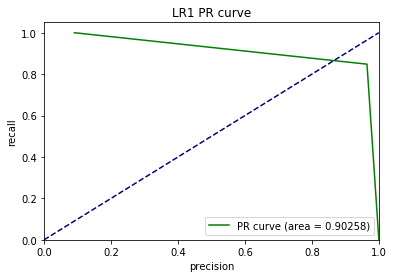

In [76]:
plt.figure()
plt.plot(pre, rec, color ='green', label='PR curve (area = %0.5f)' % f1_score)
plt.plot([0, 1], [0, 1], color ='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('LR1 PR curve')
plt.legend(loc="lower right")
plt.show()
plt.close() 

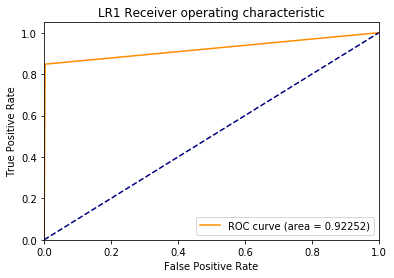

In [77]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR1 Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.close() 

## 4.3 --  LogisticRegressionL2

In [78]:
LR2_x_train, LR2_y_train = x_train[:], y_train[:]
LR2.fit(LR2_x_train, LR2_y_train)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
LR2_x_test =  x_test[:]
LR2_y_test = LR2.predict(LR2_x_test)
print(LR2_y_test.shape)

(27590,)


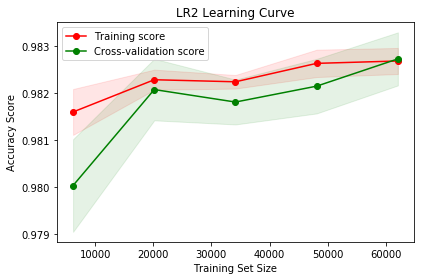

In [80]:
train_sizes, train_scores, test_scores = learning_curve(LR2, LR2_x_train, LR2_y_train, cv = 4, scoring='accuracy', n_jobs=-1)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Create plot
plt.title("LR2 Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [81]:
print(confusion_matrix(y_test, LR2_y_test))
tn, fp, fn, tp = confusion_matrix(y_test, LR2_y_test).ravel()
print(tn, fp, fn, tp)

[[25013    81]
 [  390  2106]]
25013 81 390 2106


In [82]:
print(classification_report(y_test, LR2_y_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     25094
         1.0       0.96      0.84      0.90      2496

   micro avg       0.98      0.98      0.98     27590
   macro avg       0.97      0.92      0.95     27590
weighted avg       0.98      0.98      0.98     27590



In [83]:
print('hamming loss: ', hamming_loss(y_test, LR2_y_test))
print('log loss: ', log_loss(y_test, LR2_y_test))
print('zero one loss: ', zero_one_loss(y_test, LR2_y_test))

hamming loss:  0.01707140268213121
log loss:  0.589627707480783
zero one loss:  0.017071402682131254


In [84]:
print('mean absolute error: ',  mean_absolute_error(y_test, LR2_y_test) )
print('mean squared error: ', mean_squared_error(y_test, LR2_y_test) )
print('mean squared log error: ',  mean_squared_log_error(y_test, LR2_y_test) )
print('median absolute error: ', median_absolute_error(y_test, LR2_y_test) )

mean absolute error:  0.01707140268213121
mean squared error:  0.01707140268213121
mean squared log error:  0.008202006870441205
median absolute error:  0.0


In [85]:
print( 'accuracy score: ', accuracy_score(y_test, LR2_y_test) )
precision_score = metrics.precision_score(y_test, LR2_y_test)
print('precision score: ' , precision_score )
recall_score = metrics.recall_score(y_test, LR2_y_test)
print('recall score: ' , recall_score)
f1_score = metrics.f1_score(y_test, LR2_y_test) # f1 = (2 * pre * rec) / (pre + rec)
print('F1 score: ' , f1_score)
auc_score = roc_auc_score(y_test, LR2_y_test)
print('auc_score: ', auc_score)

accuracy score:  0.9829285973178687
precision score:  0.9629629629629629
recall score:  0.84375
F1 score:  0.8994234465086484
auc_score:  0.9202610683828804


In [86]:
print('precision_recall_curve: \n', precision_recall_curve(y_test, LR2_y_test))
pre, rec, t = precision_recall_curve(y_test, LR2_y_test)
print(pre, rec, t)
print('roc curve: \n', roc_curve(y_test, LR2_y_test))
fpr, tpr, thresholds = roc_curve(y_test, LR2_y_test)
print(fpr, tpr, thresholds)

precision_recall_curve: 
 (array([0.09046756, 0.96296296, 1.        ]), array([1.     , 0.84375, 0.     ]), array([0., 1.]))
[0.09046756 0.96296296 1.        ] [1.      0.84375 0.     ] [0. 1.]
roc curve: 
 (array([0.        , 0.00322786, 1.        ]), array([0.     , 0.84375, 1.     ]), array([2., 1., 0.]))
[0.         0.00322786 1.        ] [0.      0.84375 1.     ] [2. 1. 0.]


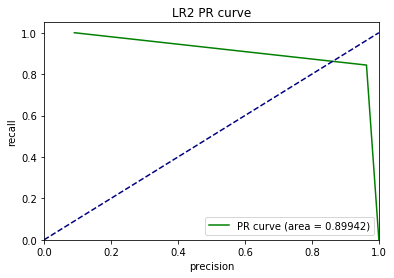

In [87]:
plt.figure()
plt.plot(pre, rec, color ='green', label='PR curve (area = %0.5f)' % f1_score)
plt.plot([0, 1], [0, 1], color ='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('LR2 PR curve')
plt.legend(loc="lower right")
plt.show()
plt.close() 

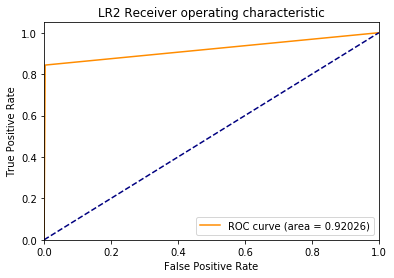

In [88]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR2 Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.close() 

## 4.4 --  SGD

In [89]:
SGD_x_train, SGD_y_train = x_train[:], y_train[:]
SGD.fit(SGD_x_train, SGD_y_train)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
SGD_x_test =  x_test[:]
SGD_y_test = SGD.predict(SGD_x_test)
print(SGD_y_test.shape)

(27590,)


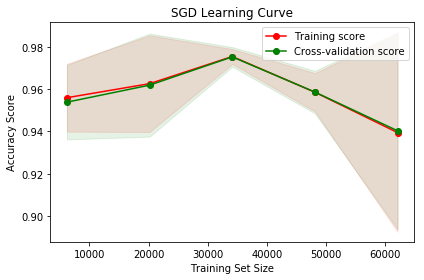

In [91]:
train_sizes, train_scores, test_scores = learning_curve(SGD, SGD_x_train, SGD_y_train, cv = 4, scoring='accuracy', n_jobs=-1)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Create plot
plt.title("SGD Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [92]:
print(confusion_matrix(y_test, SGD_y_test))
tn, fp, fn, tp = confusion_matrix(y_test, SGD_y_test).ravel()
print(tn, fp, fn, tp)

[[25008    86]
 [  598  1898]]
25008 86 598 1898


In [93]:
print(classification_report(y_test, SGD_y_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     25094
         1.0       0.96      0.76      0.85      2496

   micro avg       0.98      0.98      0.98     27590
   macro avg       0.97      0.88      0.92     27590
weighted avg       0.97      0.98      0.97     27590



In [94]:
print('hamming loss: ', hamming_loss(y_test, SGD_y_test))
print('log loss: ', log_loss(y_test, SGD_y_test))
print('zero one loss: ', zero_one_loss(y_test, SGD_y_test))

hamming loss:  0.02479159115621602
log loss:  0.8562737158208745
zero one loss:  0.024791591156215986


In [95]:
print('mean absolute error: ',  mean_absolute_error(y_test, SGD_y_test) )
print('mean squared error: ', mean_squared_error(y_test, SGD_y_test) )
print('mean squared log error: ',  mean_squared_log_error(y_test, SGD_y_test) )
print('median absolute error: ', median_absolute_error(y_test, SGD_y_test) )

mean absolute error:  0.02479159115621602
mean squared error:  0.02479159115621602
mean squared log error:  0.011911194690831812
median absolute error:  0.0


In [96]:
print( 'accuracy score: ', accuracy_score(y_test, SGD_y_test) )
precision_score = metrics.precision_score(y_test, SGD_y_test)
print('precision score: ' , precision_score )
recall_score = metrics.recall_score(y_test, SGD_y_test)
print('recall score: ' , recall_score)
f1_score = metrics.f1_score(y_test, SGD_y_test) # f1 = (2 * pre * rec) / (pre + rec)
print('F1 score: ' , f1_score)
auc_score = roc_auc_score(y_test, SGD_y_test)
print('auc_score: ', auc_score)

accuracy score:  0.975208408843784
precision score:  0.9566532258064516
recall score:  0.7604166666666666
F1 score:  0.8473214285714286
auc_score:  0.8784947763077495


In [97]:
print('precision_recall_curve: \n', precision_recall_curve(y_test, SGD_y_test))
pre, rec, t = precision_recall_curve(y_test, SGD_y_test)
print(pre, rec, t)
print('roc curve: \n', roc_curve(y_test, SGD_y_test))
fpr, tpr, thresholds = roc_curve(y_test, SGD_y_test)
print(fpr, tpr, thresholds)

precision_recall_curve: 
 (array([0.09046756, 0.95665323, 1.        ]), array([1.        , 0.76041667, 0.        ]), array([0., 1.]))
[0.09046756 0.95665323 1.        ] [1.         0.76041667 0.        ] [0. 1.]
roc curve: 
 (array([0.        , 0.00342711, 1.        ]), array([0.        , 0.76041667, 1.        ]), array([2., 1., 0.]))
[0.         0.00342711 1.        ] [0.         0.76041667 1.        ] [2. 1. 0.]


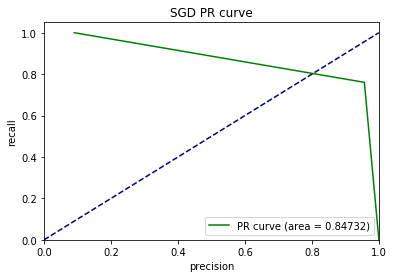

In [98]:
plt.figure()
plt.plot(pre, rec, color ='green', label='PR curve (area = %0.5f)' % f1_score)
plt.plot([0, 1], [0, 1], color ='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('SGD PR curve')
plt.legend(loc="lower right")
plt.show()
plt.close() 

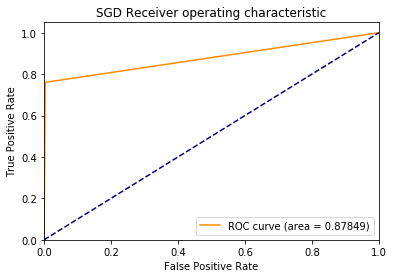

In [99]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SGD Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.close() 

## 4.5 --  MLPClassifier

In [100]:
MLP_x_train, MLP_y_train = x_train[:], y_train[:]
MLP.fit(MLP_x_train, MLP_y_train)

Iteration 1, loss = 0.51324334
Iteration 2, loss = 0.06618895
Iteration 3, loss = 0.05777788
Iteration 4, loss = 0.05210829
Iteration 5, loss = 0.04866387
Iteration 6, loss = 0.04554721
Iteration 7, loss = 0.04289842
Iteration 8, loss = 0.04342350
Iteration 9, loss = 0.04160295
Iteration 10, loss = 0.03892387
Iteration 11, loss = 0.03973109
Iteration 12, loss = 0.03809280
Iteration 13, loss = 0.03834423
Iteration 14, loss = 0.03628962
Iteration 15, loss = 0.03855000
Iteration 16, loss = 0.03759942
Iteration 17, loss = 0.03594632
Iteration 18, loss = 0.03453398
Iteration 19, loss = 0.03484250
Iteration 20, loss = 0.03596321
Iteration 21, loss = 0.03286497
Iteration 22, loss = 0.03299260
Iteration 23, loss = 0.03277144
Iteration 24, loss = 0.03349759
Iteration 25, loss = 0.03290232
Iteration 26, loss = 0.03300952
Iteration 27, loss = 0.03198653
Iteration 28, loss = 0.03245796
Iteration 29, loss = 0.03314864
Iteration 30, loss = 0.03180922
Iteration 31, loss = 0.03060851
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [101]:
MLP_x_test =  x_test[:]
MLP_y_test = MLP.predict(MLP_x_test)
print(MLP_y_test.shape)

(27590,)


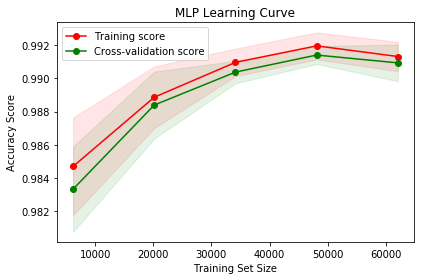

In [102]:
train_sizes, train_scores, test_scores = learning_curve(MLP, MLP_x_train, MLP_y_train, cv = 4, scoring='accuracy', n_jobs=-1)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Create plot
plt.title("MLP Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [103]:
print(confusion_matrix(y_test, MLP_y_test))
tn, fp, fn, tp = confusion_matrix(y_test, MLP_y_test).ravel()
print(tn, fp, fn, tp)

[[25026    68]
 [  162  2334]]
25026 68 162 2334


In [104]:
print(classification_report(y_test, MLP_y_test))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     25094
         1.0       0.97      0.94      0.95      2496

   micro avg       0.99      0.99      0.99     27590
   macro avg       0.98      0.97      0.97     27590
weighted avg       0.99      0.99      0.99     27590



In [105]:
print('hamming loss: ', hamming_loss(y_test, MLP_y_test))
print('log loss: ', log_loss(y_test, MLP_y_test))
print('zero one loss: ', zero_one_loss(y_test, MLP_y_test))

hamming loss:  0.008336353751359188
log loss:  0.28792942890375994
zero one loss:  0.008336353751359216


In [106]:
print('mean absolute error: ',  mean_absolute_error(y_test, MLP_y_test) )
print('mean squared error: ', mean_squared_error(y_test, MLP_y_test) )
print('mean squared log error: ',  mean_squared_log_error(y_test, MLP_y_test) )
print('median absolute error: ', median_absolute_error(y_test, MLP_y_test) )

mean absolute error:  0.008336353751359188
mean squared error:  0.008336353751359188
mean squared log error:  0.004005226284928827
median absolute error:  0.0


In [107]:
print( 'accuracy score: ', accuracy_score(y_test, MLP_y_test) )
precision_score = metrics.precision_score(y_test, MLP_y_test)
print('precision score: ' , precision_score )
recall_score = metrics.recall_score(y_test, MLP_y_test)
print('recall score: ' , recall_score)
f1_score = metrics.f1_score(y_test, MLP_y_test) # f1 = (2 * pre * rec) / (pre + rec)
print('F1 score: ' , f1_score)
auc_score = roc_auc_score(y_test, MLP_y_test)
print('auc_score: ', auc_score)

accuracy score:  0.9916636462486408
precision score:  0.9716902581182348
recall score:  0.9350961538461539
F1 score:  0.9530420579828501
auc_score:  0.9661931713679642


In [108]:
print('precision_recall_curve: \n', precision_recall_curve(y_test, MLP_y_test))
pre, rec, t = precision_recall_curve(y_test, MLP_y_test)
print(pre, rec, t)
print('roc curve: \n', roc_curve(y_test, MLP_y_test))
fpr, tpr, thresholds = roc_curve(y_test, MLP_y_test)
print(fpr, tpr, thresholds)

precision_recall_curve: 
 (array([0.09046756, 0.97169026, 1.        ]), array([1.        , 0.93509615, 0.        ]), array([0., 1.]))
[0.09046756 0.97169026 1.        ] [1.         0.93509615 0.        ] [0. 1.]
roc curve: 
 (array([0.        , 0.00270981, 1.        ]), array([0.        , 0.93509615, 1.        ]), array([2., 1., 0.]))
[0.         0.00270981 1.        ] [0.         0.93509615 1.        ] [2. 1. 0.]


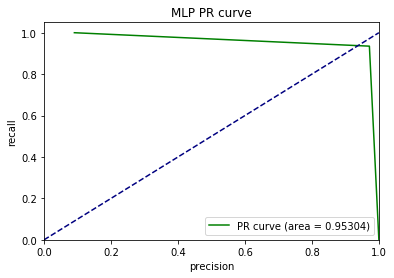

In [109]:
plt.figure()
plt.plot(pre, rec, color ='green', label='PR curve (area = %0.5f)' % f1_score)
plt.plot([0, 1], [0, 1], color ='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('MLP PR curve')
plt.legend(loc="lower right")
plt.show()
plt.close() 

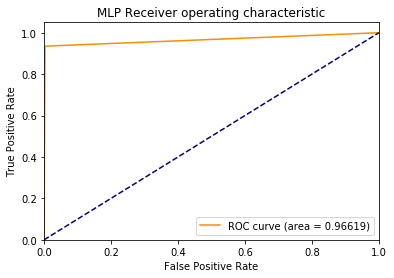

In [110]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.close() 

## 4.6 --  SVC

In [111]:
SVC_x_train, SVC_y_train = x_train[:], y_train[:]
SVC.fit(SVC_x_train, SVC_y_train)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [112]:
SVC_x_test =  x_test[:]
SVC_y_test = SVC.predict(SVC_x_test)
print(SVC_y_test.shape)

(27590,)


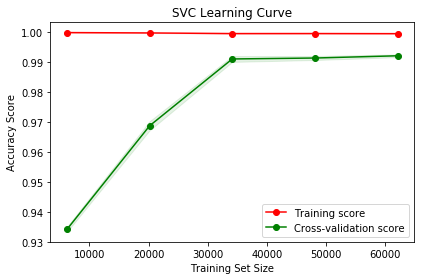

In [113]:
train_sizes, train_scores, test_scores = learning_curve(SVC, SVC_x_train, SVC_y_train, cv = 4, scoring='accuracy', n_jobs=-1)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Create plot
plt.title("SVC Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [114]:
print(confusion_matrix(y_test, SVC_y_test))
tn, fp, fn, tp = confusion_matrix(y_test, SVC_y_test).ravel()
print(tn, fp, fn, tp)

[[24957   137]
 [   54  2442]]
24957 137 54 2442


In [115]:
print(classification_report(y_test, SVC_y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     25094
         1.0       0.95      0.98      0.96      2496

   micro avg       0.99      0.99      0.99     27590
   macro avg       0.97      0.99      0.98     27590
weighted avg       0.99      0.99      0.99     27590



In [116]:
print('hamming loss: ', hamming_loss(y_test, SVC_y_test))
print('log loss: ', log_loss(y_test, SVC_y_test))
print('zero one loss: ', zero_one_loss(y_test, SVC_y_test))

hamming loss:  0.006922798115259152
log loss:  0.2391089465848461
zero one loss:  0.006922798115259199


In [117]:
print('mean absolute error: ',  mean_absolute_error(y_test, SVC_y_test) )
print('mean squared error: ', mean_squared_error(y_test, SVC_y_test) )
print('mean squared log error: ',  mean_squared_log_error(y_test, SVC_y_test) )
print('median absolute error: ', median_absolute_error(y_test, SVC_y_test) )

mean absolute error:  0.006922798115259152
mean squared error:  0.006922798115259152
mean squared log error:  0.003326079219223503
median absolute error:  0.0


In [118]:
print( 'accuracy score: ', accuracy_score(y_test, SVC_y_test) )
precision_score = metrics.precision_score(y_test, SVC_y_test)
print('precision score: ' , precision_score )
recall_score = metrics.recall_score(y_test, SVC_y_test)
print('recall score: ' , recall_score)
f1_score = metrics.f1_score(y_test, SVC_y_test) # f1 = (2 * pre * rec) / (pre + rec)
print('F1 score: ' , f1_score)
auc_score = roc_auc_score(y_test, SVC_y_test)
print('auc_score: ', auc_score)

accuracy score:  0.9930772018847408
precision score:  0.9468786351298953
recall score:  0.9783653846153846
F1 score:  0.9623645320197044
auc_score:  0.9864529561157739


In [119]:
print('precision_recall_curve: \n', precision_recall_curve(y_test, SVC_y_test))
pre, rec, t = precision_recall_curve(y_test, SVC_y_test)
print(pre, rec, t)
print('roc curve: \n', roc_curve(y_test, SVC_y_test))
fpr, tpr, thresholds = roc_curve(y_test, SVC_y_test)
print(fpr, tpr, thresholds)

precision_recall_curve: 
 (array([0.09046756, 0.94687864, 1.        ]), array([1.        , 0.97836538, 0.        ]), array([0., 1.]))
[0.09046756 0.94687864 1.        ] [1.         0.97836538 0.        ] [0. 1.]
roc curve: 
 (array([0.        , 0.00545947, 1.        ]), array([0.        , 0.97836538, 1.        ]), array([2., 1., 0.]))
[0.         0.00545947 1.        ] [0.         0.97836538 1.        ] [2. 1. 0.]


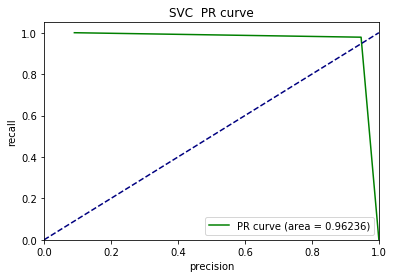

In [120]:
plt.figure()
plt.plot(pre, rec, color ='green', label='PR curve (area = %0.5f)' % f1_score)
plt.plot([0, 1], [0, 1], color ='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('SVC  PR curve')
plt.legend(loc="lower right")
plt.show()
plt.close() 

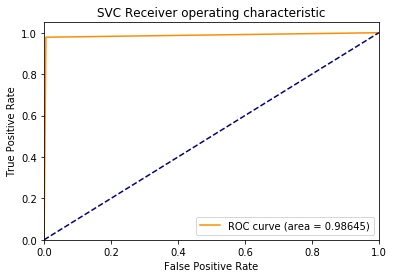

In [121]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.close() 

## 4.7 --  RandomForest

In [122]:
RF_x_train, RF_y_train = x_train[:], y_train[:]
RF.fit(RF_x_train, RF_y_train)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [123]:
RF_x_test =  x_test[:]
RF_y_test = RF.predict(RF_x_test)
print(RF_y_test.shape)

(27590,)


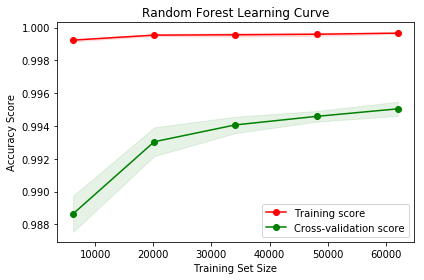

In [124]:
train_sizes, train_scores, test_scores = learning_curve(RF, RF_x_train, RF_y_train, cv = 4, scoring='accuracy', n_jobs=-1)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Create plot
plt.title("Random Forest Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [125]:
print(confusion_matrix(y_test, RF_y_test))
tn, fp, fn, tp = confusion_matrix(y_test, RF_y_test).ravel()
print(tn, fp, fn, tp)

[[25068    26]
 [   77  2419]]
25068 26 77 2419


In [126]:
print(classification_report(y_test, RF_y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25094
         1.0       0.99      0.97      0.98      2496

   micro avg       1.00      1.00      1.00     27590
   macro avg       0.99      0.98      0.99     27590
weighted avg       1.00      1.00      1.00     27590



In [127]:
print('hamming loss: ', hamming_loss(y_test, RF_y_test))
print('log loss: ', log_loss(y_test, RF_y_test))
print('zero one loss: ', zero_one_loss(y_test, RF_y_test))

hamming loss:  0.003733236679956506
log loss:  0.12894218043526684
zero one loss:  0.0037332366799565087


In [128]:
print('mean absolute error: ',  mean_absolute_error(y_test, RF_y_test) )
print('mean squared error: ', mean_squared_error(y_test, RF_y_test) )
print('mean squared log error: ',  mean_squared_log_error(y_test, RF_y_test) )
print('median absolute error: ', median_absolute_error(y_test, RF_y_test) )

mean absolute error:  0.003733236679956506
mean squared error:  0.003733236679956506
mean squared log error:  0.001793644814555083
median absolute error:  0.0


In [129]:
print( 'accuracy score: ', accuracy_score(y_test, RF_y_test) )
precision_score = metrics.precision_score(y_test, RF_y_test)
print('precision score: ' , precision_score )
recall_score = metrics.recall_score(y_test, RF_y_test)
print('recall score: ' , recall_score)
f1_score = metrics.f1_score(y_test, RF_y_test) # f1 = (2 * pre * rec) / (pre + rec)
print('F1 score: ' , f1_score)
auc_score = roc_auc_score(y_test, RF_y_test)
print('auc_score: ', auc_score)

accuracy score:  0.9962667633200435
precision score:  0.9893660531697341
recall score:  0.9691506410256411
F1 score:  0.9791540174053835
auc_score:  0.9840572683888068


In [130]:
print('precision_recall_curve: \n', precision_recall_curve(y_test, RF_y_test))
pre, rec, t = precision_recall_curve(y_test, RF_y_test)
print(pre, rec, t)
print('roc curve: \n', roc_curve(y_test, RF_y_test))
fpr, tpr, thresholds = roc_curve(y_test, RF_y_test)
print(fpr, tpr, thresholds)

precision_recall_curve: 
 (array([0.09046756, 0.98936605, 1.        ]), array([1.        , 0.96915064, 0.        ]), array([0., 1.]))
[0.09046756 0.98936605 1.        ] [1.         0.96915064 0.        ] [0. 1.]
roc curve: 
 (array([0.       , 0.0010361, 1.       ]), array([0.        , 0.96915064, 1.        ]), array([2., 1., 0.]))
[0.        0.0010361 1.       ] [0.         0.96915064 1.        ] [2. 1. 0.]


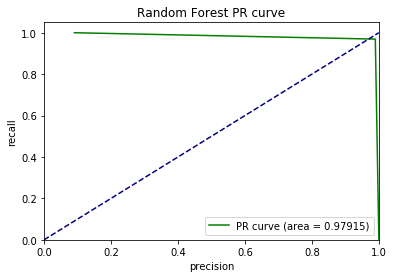

In [131]:
plt.figure()
plt.plot(pre, rec, color ='green', label='PR curve (area = %0.5f)' % f1_score)
plt.plot([0, 1], [0, 1], color ='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Random Forest PR curve')
plt.legend(loc="lower right")
plt.show()
plt.close() 

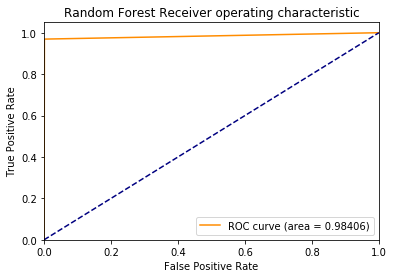

In [132]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.close() 

## 4.8 --  DecisionTreeClassifier

In [133]:
DT_x_train, DT_y_train = x_train[:], y_train[:]
DT.fit(DT_x_train, DT_y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [134]:
DT_x_test =  x_test[:]
DT_y_test = DT.predict(DT_x_test)
print(DT_y_test.shape)

(27590,)


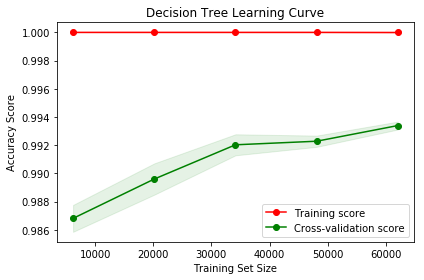

In [135]:
train_sizes, train_scores, test_scores = learning_curve(DT, DT_x_train, DT_y_train, cv = 4, scoring='accuracy', n_jobs=-1)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Create plot
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [136]:
print(confusion_matrix(y_test, DT_y_test))
tn, fp, fn, tp = confusion_matrix(y_test, DT_y_test).ravel()
print(tn, fp, fn, tp)

[[25013    81]
 [   71  2425]]
25013 81 71 2425


In [137]:
print(classification_report(y_test, DT_y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     25094
         1.0       0.97      0.97      0.97      2496

   micro avg       0.99      0.99      0.99     27590
   macro avg       0.98      0.98      0.98     27590
weighted avg       0.99      0.99      0.99     27590



In [138]:
print('hamming loss: ', hamming_loss(y_test, DT_y_test))
print('log loss: ', log_loss(y_test, DT_y_test))
print('zero one loss: ', zero_one_loss(y_test, DT_y_test))

hamming loss:  0.005509242479159115
log loss:  0.1902848415881949
zero one loss:  0.005509242479159071


In [139]:
print('mean absolute error: ',  mean_absolute_error(y_test, DT_y_test) )
print('mean squared error: ', mean_squared_error(y_test, DT_y_test) )
print('mean squared log error: ',  mean_squared_log_error(y_test, DT_y_test) )
print('median absolute error: ', median_absolute_error(y_test, DT_y_test) )

mean absolute error:  0.005509242479159115
mean squared error:  0.005509242479159115
mean squared log error:  0.0026469321535181802
median absolute error:  0.0


In [140]:
print( 'accuracy score: ', accuracy_score(y_test, DT_y_test) )
precision_score = metrics.precision_score(y_test, DT_y_test)
print('precision score: ' , precision_score )
recall_score = metrics.recall_score(y_test, DT_y_test)
print('recall score: ' , recall_score)
f1_score = metrics.f1_score(y_test, DT_y_test) # f1 = (2 * pre * rec) / (pre + rec)
print('F1 score: ' , f1_score)
auc_score = roc_auc_score(y_test, DT_y_test)
print('auc_score: ', auc_score)

accuracy score:  0.9944907575208409
precision score:  0.9676775738228253
recall score:  0.9715544871794872
F1 score:  0.9696121551379447
auc_score:  0.984163311972624


In [141]:
print('precision_recall_curve: \n', precision_recall_curve(y_test, DT_y_test))
pre, rec, t = precision_recall_curve(y_test, DT_y_test)
print(pre, rec, t)
print('roc curve: \n', roc_curve(y_test, DT_y_test))
fpr, tpr, thresholds = roc_curve(y_test, DT_y_test)
print(fpr, tpr, thresholds)

precision_recall_curve: 
 (array([0.09046756, 0.96767757, 1.        ]), array([1.        , 0.97155449, 0.        ]), array([0., 1.]))
[0.09046756 0.96767757 1.        ] [1.         0.97155449 0.        ] [0. 1.]
roc curve: 
 (array([0.        , 0.00322786, 1.        ]), array([0.        , 0.97155449, 1.        ]), array([2., 1., 0.]))
[0.         0.00322786 1.        ] [0.         0.97155449 1.        ] [2. 1. 0.]


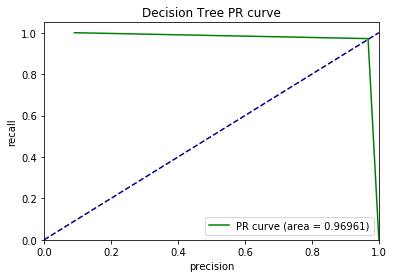

In [142]:
plt.figure()
plt.plot(pre, rec, color ='green', label='PR curve (area = %0.5f)' % f1_score)
plt.plot([0, 1], [0, 1], color ='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Decision Tree PR curve')
plt.legend(loc="lower right")
plt.show()
plt.close() 

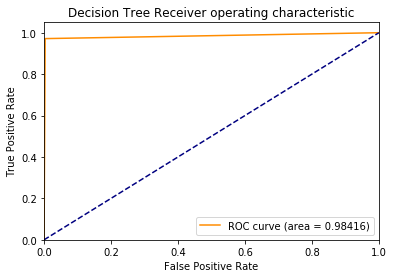

In [143]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.close() 

## 4.9 --  MultinomialNB

In [144]:
MNB_x_train, MNB_y_train = x_train[:], y_train[:]
MNB.fit(MNB_x_train, MNB_y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [145]:
MNB_x_test =  x_test[:]
MNB_y_test = MNB.predict(MNB_x_test)
print(MNB_y_test.shape)

(27590,)


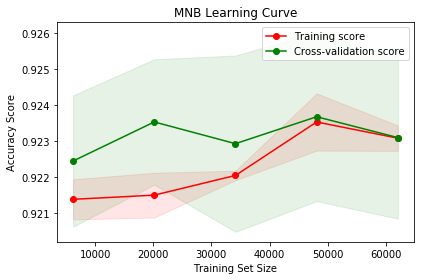

In [146]:
train_sizes, train_scores, test_scores = learning_curve(MNB, MNB_x_train, MNB_y_train, cv = 4, scoring='accuracy', n_jobs=-1)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Create plot
plt.title("MNB Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [147]:
print(confusion_matrix(y_test, MNB_y_test))
tn, fp, fn, tp = confusion_matrix(y_test, MNB_y_test).ravel()
print(tn, fp, fn, tp)

[[23205  1889]
 [  214  2282]]
23205 1889 214 2282


In [148]:
print(classification_report(y_test, MNB_y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.96     25094
         1.0       0.55      0.91      0.68      2496

   micro avg       0.92      0.92      0.92     27590
   macro avg       0.77      0.92      0.82     27590
weighted avg       0.95      0.92      0.93     27590



In [149]:
print('hamming loss: ', hamming_loss(y_test, MNB_y_test))
print('log loss: ', log_loss(y_test, MNB_y_test))
print('zero one loss: ', zero_one_loss(y_test, MNB_y_test))

hamming loss:  0.07622326930047119
log loss:  2.6327132003640026
zero one loss:  0.07622326930047119


In [150]:
print('mean absolute error: ',  mean_absolute_error(y_test, MNB_y_test) )
print('mean squared error: ', mean_squared_error(y_test, MNB_y_test) )
print('mean squared log error: ',  mean_squared_log_error(y_test, MNB_y_test) )
print('median absolute error: ', median_absolute_error(y_test, MNB_y_test) )

mean absolute error:  0.07622326930047119
mean squared error:  0.07622326930047119
mean squared log error:  0.036621699466110096
median absolute error:  0.0


In [151]:
print( 'accuracy score: ', accuracy_score(y_test, MNB_y_test) )
precision_score = metrics.precision_score(y_test, MNB_y_test)
print('precision score: ' , precision_score )
recall_score = metrics.recall_score(y_test, MNB_y_test)
print('recall score: ' , recall_score)
f1_score = metrics.f1_score(y_test, MNB_y_test) # f1 = (2 * pre * rec) / (pre + rec)
print('F1 score: ' , f1_score)
auc_score = roc_auc_score(y_test, MNB_y_test)
print('auc_score: ', auc_score)

accuracy score:  0.9237767306995288
precision score:  0.5471110045552625
recall score:  0.9142628205128205
F1 score:  0.6845657717114144
auc_score:  0.919492930938645


In [152]:
print('precision_recall_curve: \n', precision_recall_curve(y_test, MNB_y_test))
pre, rec, t = precision_recall_curve(y_test, MNB_y_test)
print(pre, rec, t)
print('roc curve: \n', roc_curve(y_test, MNB_y_test))
fpr, tpr, thresholds = roc_curve(y_test, MNB_y_test)
print(fpr, tpr, thresholds)

precision_recall_curve: 
 (array([0.09046756, 0.547111  , 1.        ]), array([1.        , 0.91426282, 0.        ]), array([0., 1.]))
[0.09046756 0.547111   1.        ] [1.         0.91426282 0.        ] [0. 1.]
roc curve: 
 (array([0.        , 0.07527696, 1.        ]), array([0.        , 0.91426282, 1.        ]), array([2., 1., 0.]))
[0.         0.07527696 1.        ] [0.         0.91426282 1.        ] [2. 1. 0.]


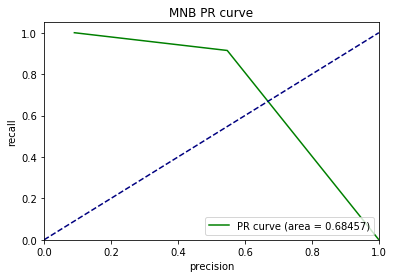

In [153]:
plt.figure()
plt.plot(pre, rec, color ='green', label='PR curve (area = %0.5f)' % f1_score)
plt.plot([0, 1], [0, 1], color ='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('MNB PR curve')
plt.legend(loc="lower right")
plt.show()
plt.close() 

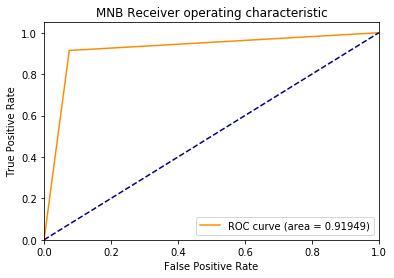

In [154]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.5f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MNB Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
plt.close() 